In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt 
%matplotlib inline

import random as rand

import sklearn.linear_model as lm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sklearn.preprocessing as prep

FoundingDateGrouped, employeesGrouped, FiscalMonth, CEOAge

In [3]:
np.random.seed(26)
df = pd.read_csv('IPODataFull.csv', encoding= 'unicode_escape')

feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1344,1427,1434,1545,1548,1551,1553,1554,1555,1564,1589,1590,1607,1610,1617,1621,1622,1623,1624,1631,1632,1634,1635,1642,1643,1644,1645,1646,1648) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0 	 Symbol 			 <class 'str'>
1 	 DaysBetterThanSP 			 <class 'numpy.int64'>
2 	 daysProfit 			 <class 'numpy.int64'>
3 	 daysProfitGrouped 			 <class 'str'>
4 	 exactDiffernce 			 <class 'numpy.float64'>
5 	 Year 			 <class 'numpy.int64'>
6 	 Month 			 <class 'numpy.int64'>
7 	 Day 			 <class 'numpy.int64'>
8 	 dayOfWeek 			 <class 'numpy.int64'>
9 	 closeDay0 			 <class 'numpy.float64'>
10 	 highDay0 			 <class 'numpy.float64'>
11 	 openDay0 			 <class 'numpy.float64'>
12 	 lowDay0 			 <class 'numpy.float64'>
13 	 volumeDay0 			 <class 'numpy.float64'>
14 	 closeDay1 			 <class 'numpy.float64'>
15 	 highDay1 			 <class 'numpy.float64'>
16 	 openDay1 			 <class 'numpy.float64'>
17 	 lowDay1 			 <class 'numpy.float64'>
18 	 volumeDay1 			 <class 'numpy.float64'>
19 	 closeDay2 			 <class 'numpy.float64'>
20 	 highDay2 			 <class 'numpy.float64'>
21 	 openDay2 			 <class 'numpy.float64'>
22 	 lowDay2 			 <class 'numpy.float64'>
23 	 volumeDay2 			 <class 'numpy.float64'>
24 	 closeDay3 	

In [4]:
# removing no volume stocks
df = df[df["volumeDay0"] > 100]

In [5]:
df = df.dropna(subset=["Revenue", "netIncome", "Sector", "yearDifference", "FoundingDateGrouped", "CEOAge"])

In [6]:
# looking at ADT
df["openDay0"] = df["lowDay0"]
df = df.dropna(subset=["openDay0","closeDay0"])

FoundingDateGrouped, employeesGrouped, FiscalMonth, CEOAge

In [7]:
df = df[df["employeesGrouped"] != "Blank"]

In [8]:
df["CEOAge"].describe()

count    1973.000000
mean       54.980233
std         7.501867
min        26.000000
25%        50.000000
50%        55.000000
75%        60.000000
max        84.000000
Name: CEOAge, dtype: float64

In [9]:
df["FiscalMonth"].unique()

array(['Oct', 'Dec', 'Sep', 'Aug', 'May', 'Jun', 'Jan', 'Mar', 'Apr',
       'Nov', 'Jul', 'Feb'], dtype=object)

Text(0.5, 1.0, 'Histogram of Company Sector')

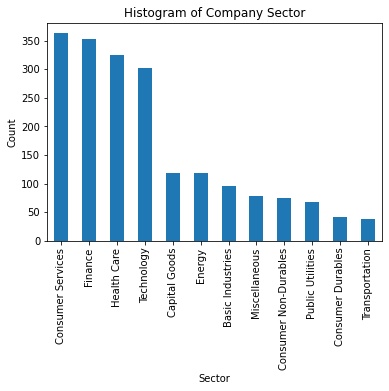

In [10]:
df["Sector"].value_counts().plot.bar()
plt.xlabel("Sector")
plt.ylabel("Count")
plt.title("Histogram of Company Sector")

In [11]:
df["Industry"] = df["Industry"].fillna("Missing")
df["Industry"].value_counts()

Major Pharmaceuticals                      168
Major Banks                                128
Real Estate Investment Trusts               99
Computer Software: Prepackaged Software     78
EDP Services                                66
                                          ... 
Oil/Gas Transmission                         1
Textiles                                     1
Paints/Coatings                              1
Aluminum                                     1
Electronics Distribution                     1
Name: Industry, Length: 126, dtype: int64

In [12]:
(df["yearDifference"])[df["yearDifference"] < 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df["day0PctChange"] = (df["closeDay0"] - df["openDay0"])/df["openDay0"]

In [14]:
df[df["day0PctChange"].isna()]

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,closeDay1,highDay1,openDay1,lowDay1,volumeDay1,closeDay2,highDay2,openDay2,lowDay2,volumeDay2,closeDay3,highDay3,openDay3,lowDay3,volumeDay3,closeDay4,highDay4,openDay4,lowDay4,volumeDay4,closeDay5,highDay5,openDay5,lowDay5,volumeDay5,closeDay6,...,General_PartnerYearBeforeIPO,Loans_issuedYearBeforeIPO,Trading_securitiesYearBeforeIPO,"Loans,_totalYearBeforeIPO",Fiscal_year_ends_in_April_USDYearBeforeIPO,Fiscal_year_ends_in_August_CNYYearBeforeIPO,Deferred_tax_liabilitiesYearBeforeIPO,Fiscal_year_ends_in_March_CADYearBeforeIPO,Fiscal_year_ends_in_December_ARSYearBeforeIPO,Derivative_assetsYearBeforeIPO,Derivative_liabilitiesYearBeforeIPO,Sales_of_intangiblesYearBeforeIPO,Prepaid_pension_costsYearBeforeIPO,Regulatory_assetsYearBeforeIPO,Regulatory_liabilitiesYearBeforeIPO,Fiscal_year_ends_in_December_CLPYearBeforeIPO,Fiscal_year_ends_in_May_USDYearBeforeIPO,Fiscal_year_ends_in_December_JPYYearBeforeIPO,Fiscal_year_ends_in_December_CADYearBeforeIPO,Fiscal_year_ends_in_December_BRLYearBeforeIPO,Pensions_and_other_postretirement_benefitsYearBeforeIPO,Fiscal_year_ends_in_October_USDYearBeforeIPO,MarketMonthTrend,Market3MonthTrend,Market6MonthTrend,MarketYearTrend,employeesGrouped,USACompany,FiscalMonth,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun,day0PctChange


In [15]:
print(df["openDay0"])

0       30.6572
1       20.0000
2       10.0000
3       13.4000
4       21.5300
         ...   
3750    11.0000
3752    25.6120
3753    27.6000
3756    31.5000
3757    10.2750
Name: openDay0, Length: 1973, dtype: float64


Text(0.5, 1.0, 'Histogram of percent change in stock on day 1')

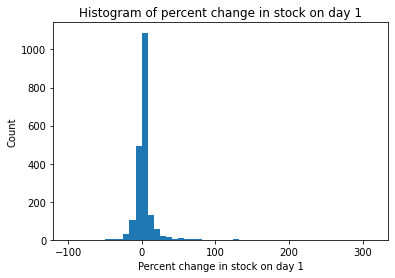

In [16]:
plt.hist((df[df["day0PctChange"] < 30])["day0PctChange"]*100, bins = 50)
plt.xlabel("Percent change in stock on day 1")
plt.ylabel("Count")
plt.title("Histogram of percent change in stock on day 1")

In [17]:
df["profitDay0"] = df["day0PctChange"] > 0

Text(0.5, 1.0, 'Histogram of if stock closed higher than it opened on day 1')

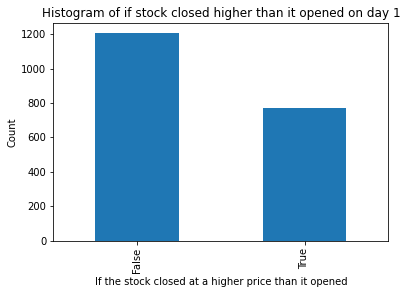

In [18]:
df["profitDay0"].value_counts().plot.bar()
plt.xlabel("If the stock closed at a higher price than it opened")
plt.ylabel("Count")
plt.title("Histogram of if stock closed higher than it opened on day 1")

Text(0.5, 1.0, 'Histogram of the Company IPO Day of the Week')

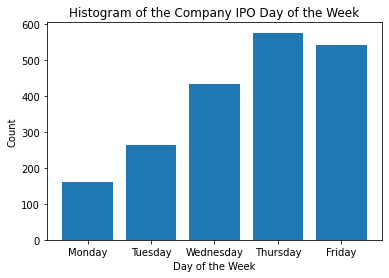

In [19]:
fig, ax = plt.subplots()
plt.bar(df['dayOfWeek'].value_counts().index,df['dayOfWeek'].value_counts().values)
ax.set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Histogram of the Company IPO Day of the Week")

Text(0.5, 1.0, 'Histogram of IPO Year')

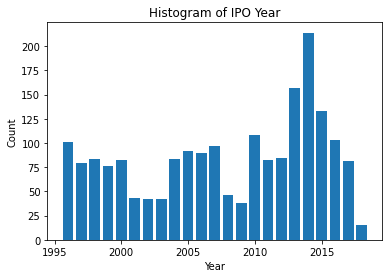

In [20]:
fig, ax = plt.subplots()
plt.bar(df['Year'].value_counts().index,df['Year'].value_counts().values)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Histogram of IPO Year")

Text(0.5, 1.0, 'Histogram of years between Year Founded and IPO Year')

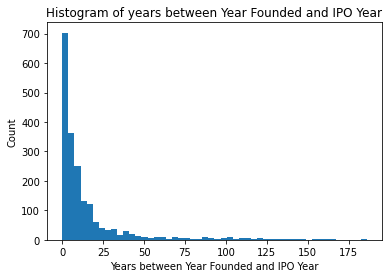

In [21]:
fig, ax = plt.subplots()
plt.hist(df['yearDifference'], bins=50)
plt.xlabel("Years between Year Founded and IPO Year")
plt.ylabel("Count")
plt.title("Histogram of years between Year Founded and IPO Year")

In [22]:
df['RevenueFormat'].describe()

count    1.973000e+03
mean     2.512040e+10
std      6.159549e+11
min      1.400000e+04
25%      1.061500e+08
50%      4.881400e+08
75%      1.800000e+09
max      2.641320e+13
Name: RevenueFormat, dtype: float64

In [23]:
df["netIncomeFormat"].describe()

count    1.973000e+03
mean     1.289950e+09
std      1.047643e+11
min     -3.117850e+12
25%     -2.094000e+07
50%      1.282000e+07
75%      1.233900e+08
max      3.311440e+12
Name: netIncomeFormat, dtype: float64

In [24]:
ohe = prep.OneHotEncoder()

In [25]:
df = df.sample(frac = 1)

In [26]:
X_cols = ["Year", "dayOfWeek", "RevenueFormat", "netIncomeFormat", "yearDifference", "CEOAge"]

In [27]:
one_hot_sector = ohe.fit_transform(df["Sector"].values.reshape(-1,1)).toarray()

In [28]:
one_hot_USA = ohe.fit_transform(df["USACompany"].values.reshape(-1,1)).toarray()

In [29]:
one_hot_founding_date = ohe.fit_transform(df["FoundingDateGrouped"].values.reshape(-1,1)).toarray()

In [30]:
one_hot_employees = ohe.fit_transform(df["employeesGrouped"].values.reshape(-1,1)).toarray()

In [31]:
one_hot_fiscal = ohe.fit_transform(df["FiscalMonth"].values.reshape(-1,1)).toarray()

Text(0.5, 1.0, 'Histogram of whether the company is from USA')

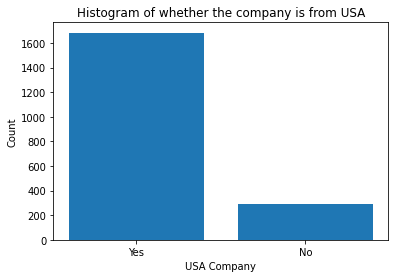

In [32]:
fig, ax = plt.subplots()
plt.bar(df['USACompany'].value_counts().index,df['USACompany'].value_counts().values)
plt.xlabel("USA Company")
plt.ylabel("Count")
plt.title("Histogram of whether the company is from USA")

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [34]:
cv = KFold(n_splits=len(df), random_state=1, shuffle=True)

In [98]:
train_proportion = 0.8
n = len(df)
t = int(train_proportion * n)

X = np.concatenate((df[X_cols], one_hot_sector, one_hot_USA, one_hot_founding_date,
                    one_hot_employees, one_hot_fiscal), axis=1)
Y1 = df["profitDay0"]
Y2 = df["day0PctChange"]
Y3 = df["closeDay0"] - df["openDay0"]

X_train = X[0:t]
X_test = X[t:n]
Y1_train = Y1.iloc[0:t]
Y1_test = Y1.iloc[t:n]
Y2_train = Y2.iloc[0:t]
Y2_test = Y2.iloc[t:n]

In [36]:
lr_model = lm.LogisticRegression()
scores = cross_val_score(lr_model, X, Y1, scoring='accuracy', cv=cv)

In [37]:
scores

array([0., 0., 1., ..., 1., 0., 1.])

In [38]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.547 (0.498)


In [117]:
def evaluate_model(data_x, data_y, margin, model):
    k_fold = KFold(10, shuffle=True, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])
    means = []
    profit = 0
    for train_ix, test_ix in k_fold.split(data_x):
        # print(train_ix)
        # print(data_y.iloc[train_ix])
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y.iloc[train_ix], data_x[test_ix], data_y.iloc[test_ix]
        test_margin = margin.iloc[test_ix]
        # Fit the classifier
        classifier = model.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)
        
        for i in range(len(predicted_labels)):
          if predicted_labels[i] == 1:
            profit = profit + test_margin.iloc[i]

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)
        means.append(np.mean(predicted_labels == test_y))

    return predicted_targets, actual_targets, means, profit/sum(predicted_targets)

In [118]:
pred, actual, means, profit = evaluate_model(X, Y1, Y3, lr_model)

In [119]:
print(np.mean(pred == actual))
print(np.std(means))
print(profit)

0.5499239736441967
0.03080608718688286
-0.02055731462925817


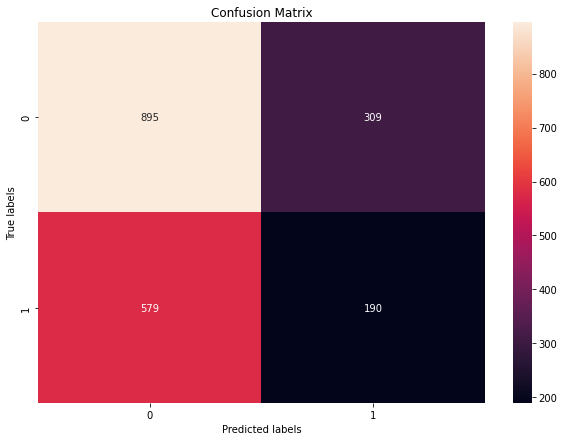

In [120]:
cfn_matrix = confusion_matrix(actual, pred)
df_cm = pd.DataFrame(cfn_matrix, range(2), range(2))
plt.figure(figsize = (10,7))
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [43]:
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); lr_model.fit(X_train, Y1_train)

LogisticRegression()

In [44]:
lr_model.score(X_train, Y1_train)

0.5361216730038023

In [45]:
lr_model.score(X_test, Y1_test)

0.5873417721518988

In [46]:
linear_model = lm.LinearRegression()

In [47]:
Y2_train.isna()

610     False
3720    False
3475    False
1607    False
1780    False
        ...  
1078    False
1330    False
2363    False
2567    False
1085    False
Name: day0PctChange, Length: 1578, dtype: bool

In [48]:
linear_model.fit(X_train, Y2_train)

LinearRegression()

In [49]:
linear_model.coef_

array([ 1.14175150e-03, -2.36345990e-04, -3.28138509e-15,  2.83552805e-14,
       -1.77747111e-04,  2.06000573e-04,  1.64114479e-02,  5.46297825e-03,
        5.91723041e-02, -2.55720149e-02, -1.30469578e-02, -1.10872826e-02,
       -1.11678716e-02, -1.38120578e-02, -2.35299698e-03, -2.15529464e-02,
        3.34617926e-03,  1.41992184e-02,  9.42577818e-03, -9.42577702e-03,
        1.05861495e-02,  1.97556955e-02, -6.55950008e-03, -2.81806795e-02,
        4.39833492e-03, -4.03315915e-03, -9.86816536e-03,  6.43947948e-03,
        6.55088511e-03, -2.17012177e-03,  3.08108069e-03, -7.58562484e-02,
        6.32555971e-02, -6.17550430e-03, -1.21757060e-02, -3.48364035e-03,
        6.44291897e-02, -1.83792376e-02,  1.52520457e-02,  2.55604029e-02,
       -1.49419101e-02, -2.93095061e-02, -8.17548199e-03])

In [50]:
linear_model.score(X_train, Y2_train)

0.029681019742524906

In [51]:
linear_model.score(X_test, Y2_test)

-0.0010397242585313826

In [52]:
import sklearn.ensemble

In [121]:
forest_model = sklearn.ensemble.RandomForestClassifier()

0.6031424227065383
0.028778011763494083
0.21708173758865248


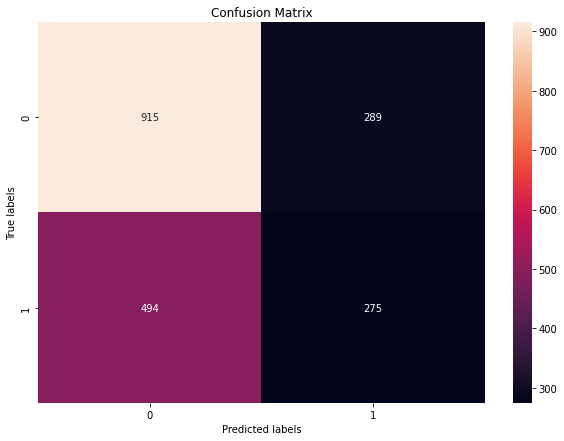

In [122]:
pred, actual, means, profit = evaluate_model(X, Y1, Y3, forest_model)
print(np.mean(pred == actual))
print(np.std(means))
print(profit)
cfn_matrix = confusion_matrix(actual, pred)
df_cm = pd.DataFrame(cfn_matrix, range(2), range(2))
plt.figure(figsize = (10,7))
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [55]:
forest_model.fit(X_train, Y1_train)

RandomForestClassifier()

In [56]:
forest_model.score(X_train, Y1_train)

1.0

In [57]:
forest_model.score(X_test, Y1_test)

0.6

In [58]:
imp = forest_model.feature_importances_

In [59]:
new_imp = [0, 0, 0, 0, 0, 0, 0]
for i in range(len(imp)):
  if (i < 5):
    new_imp[i] = imp[i]
  elif (i < 17):
    new_imp[5] = new_imp[5] + imp[i]
  else:
    new_imp[6] = new_imp[6] + imp[i]

In [60]:
names = ["Year", "dayOfWeek", "Revenue", "netIncome", "yearDifference", "Sector", "USACompany"]

In [61]:
sorted_idx = np.argsort(new_imp)

In [62]:
sorted_idx

array([1, 4, 3, 2, 0, 6, 5])

Text(0.5, 1.0, 'Random Forest Feature Importance')

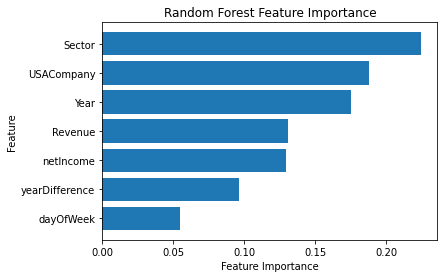

In [63]:
plt.barh([names[i] for i in sorted_idx], [new_imp[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")

In [67]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [74]:
np.logspace(-13, 3, 17)

array([1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06,
       1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])

In [75]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-13, 3, 17)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv)
grid.fit(X, Y1)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06,
       1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])})

In [76]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 1.0, 'gamma': 1e-11} with a score of 0.62


In [123]:
# svm_model = svm.SVC(kernel='rbf')
svm_model = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", C=1, gamma=0.01))

0.6198682209832742
0.03781271055219971
0.7375325966850832


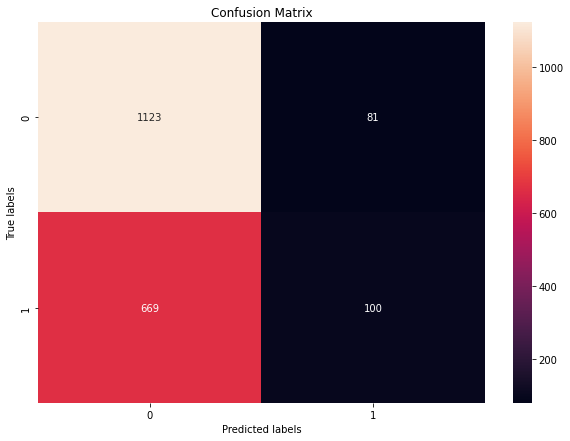

In [124]:
pred, actual, means, profit = evaluate_model(X, Y1, Y3, svm_model)
print(np.mean(pred == actual))
print(np.std(means))
print(profit)
cfn_matrix = confusion_matrix(actual, pred)
df_cm = pd.DataFrame(cfn_matrix, range(2), range(2))
plt.figure(figsize = (10,7))
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

0.5524861878453039